In [1]:
from scipy.signal import stft
from scipy import ndimage
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from load import load_train

In [2]:
train, train_meta = load_train(6)
train.info()
train_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       800000 non-null  int8 
 1   1       800000 non-null  int8 
 2   2       800000 non-null  int8 
 3   3       800000 non-null  int8 
 4   4       800000 non-null  int8 
 5   5       800000 non-null  int8 
dtypes: int8(6)
memory usage: 4.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_measurement  6 non-null      int64
 1   phase           6 non-null      int64
 2   target          6 non-null      int64
dtypes: int64(3)
memory usage: 192.0 bytes


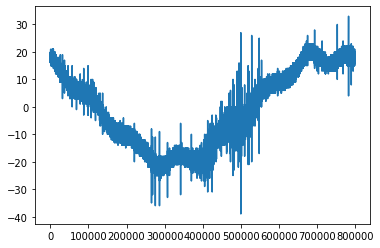

In [3]:
Fs = 40000000
n = int(Fs / 10000)
overlap = None

plt.plot()
f, t, z = stft(train.iloc[:, 0].values, fs=Fs, nperseg=n, noverlap=overlap)
#plt.pcolormesh(t, f[:10], np.abs(z)[:10], vmin=0)
plt.plot(train.iloc[:, 0])

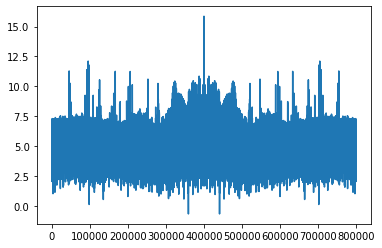

In [5]:
# k = [ for i in range()] # frequencies
ft = np.fft.fft(train.iloc[:, 0])
ft = np.fft.fftshift(ft)
plt.plot(np.log(np.abs(ft)))

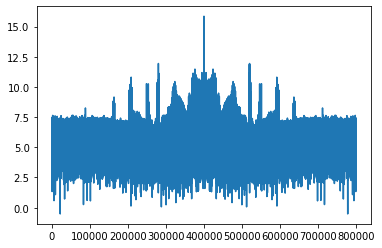

In [6]:
ft = np.fft.fft(train.iloc[:, 3])
ft = np.fft.fftshift(ft)
plt.plot(np.log(np.abs(ft)))

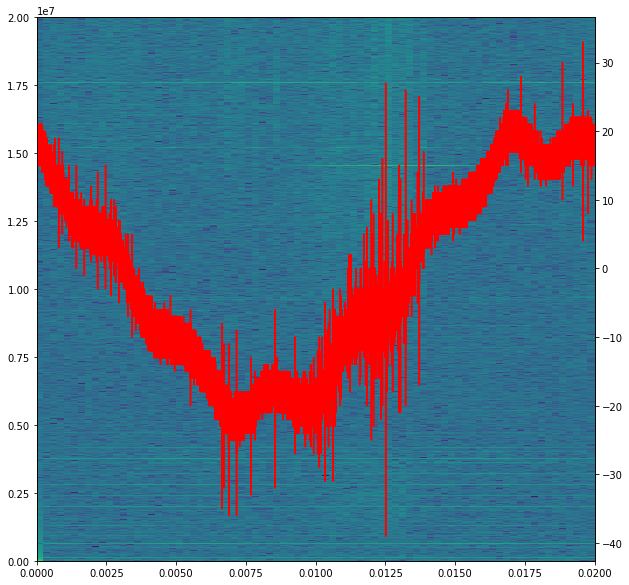

In [37]:
Fs = 40000000
n = int(Fs / 2000)
overlap = None
f, t, z = stft(train.iloc[:, 0].values, fs=Fs, nperseg=n, noverlap=overlap)

plt.figure(figsize=(10, 10))
plt.pcolormesh(t, f, np.log10(np.abs(z) + 0.00001))
ax2 = plt.twinx()
ax2.plot([j / Fs for j in range(800000)], train.iloc[:, 0], c="r")

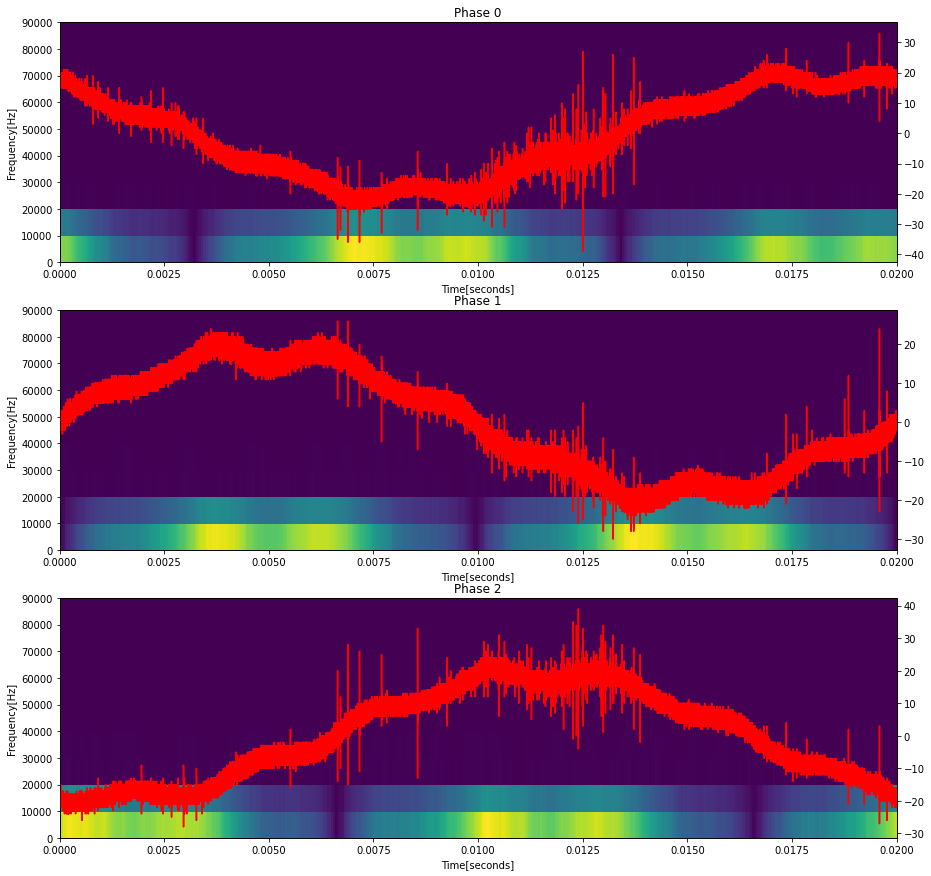

In [227]:
Fs = 40000000
n = int(Fs / 10000)
overlap = None

fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for i in range(3):
    f, t, z = stft(train.iloc[:, i].values, fs=Fs, nperseg=n, noverlap=overlap)
    ax[i].pcolormesh(t, f[:10], np.abs(z)[:10, :], vmin=0)
    ax[i].set_xlabel("Time[seconds]")
    ax[i].set_ylabel("Frequency[Hz]")
    ax[i].set_title(f"Phase {i}")
    ax2 = ax[i].twinx()
    ax2.plot([j / Fs for j in range(800000)], train.iloc[:, i], c="r")

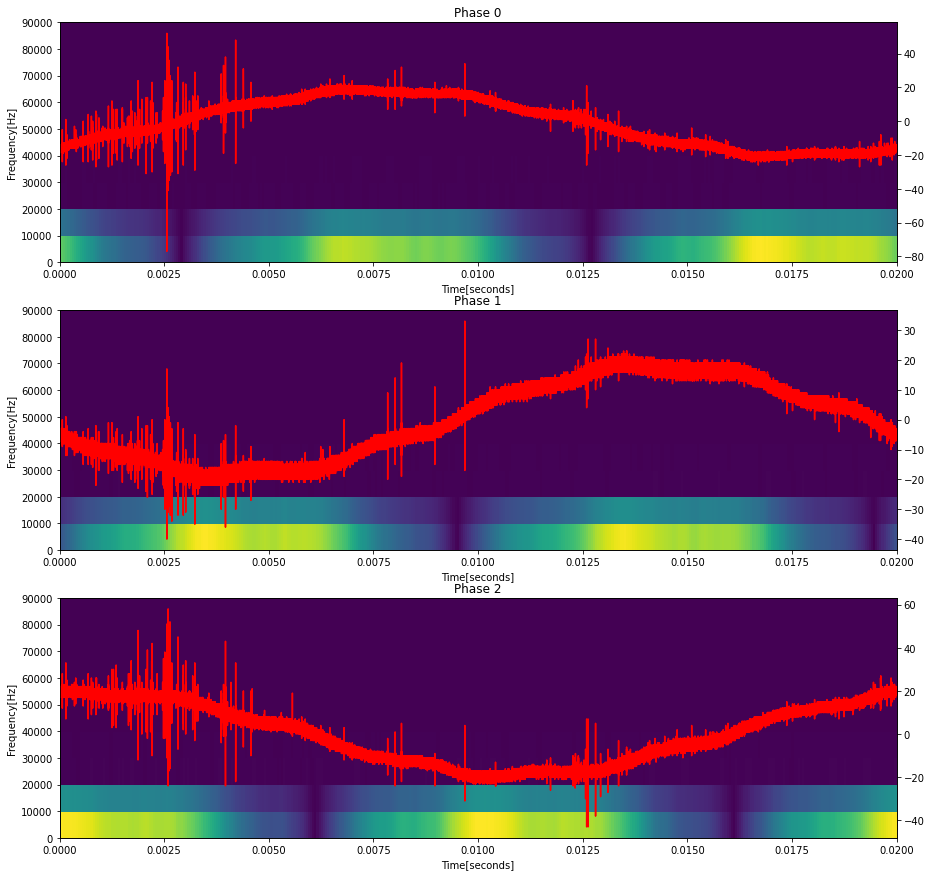

In [144]:
Fs = 40000000
n = int(Fs / 10000)
overlap = None

fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for i in range(3):
    f, t, z = stft(train.iloc[:, i + 3].values, fs=Fs, nperseg=n, noverlap=overlap)
    ax[i].pcolormesh(t, f[:10], np.abs(z)[:10, :], vmin=0)
    ax[i].set_xlabel("Time[seconds]")
    ax[i].set_ylabel("Frequency[Hz]")
    ax[i].set_title(f"Phase {i}")
    ax2 = ax[i].twinx()
    ax2.plot([j / Fs for j in range(800000)], train.iloc[:, i + 3], c="r")

Questions:
- What's the phase shift between signals? Is it always the same phase shift?
- Is the low frequency double bump that dominates the histogram always present?
- Would a periodogram better capture both the low frequency and high frequency behavior?

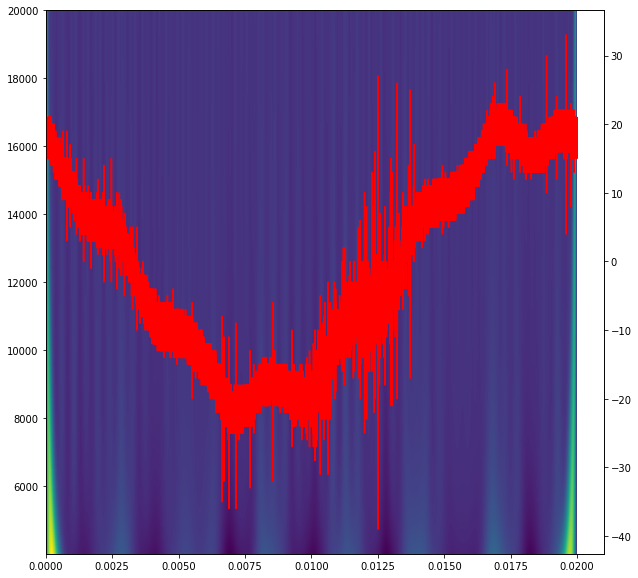

In [159]:
downsampled = signal.resample(train.iloc[:, 0], 800000 // 2)
widths = [i for i in range(1000, 5000, 20)]
z = signal.cwt(downsampled, signal.ricker, widths)
z_filt = signal.resample(z, num=z.shape[1] // 100, axis=1)
plt.figure(figsize=(10, 10))
plt.pcolormesh(
    [100 * j / (Fs / 2) for j in range(4000)],
    [Fs / 2 / (j) for j in widths],
    z_filt,

)
ax2 = plt.twinx()
ax2.plot([j / Fs for j in range(800000)], train.iloc[:, 0], c="r")

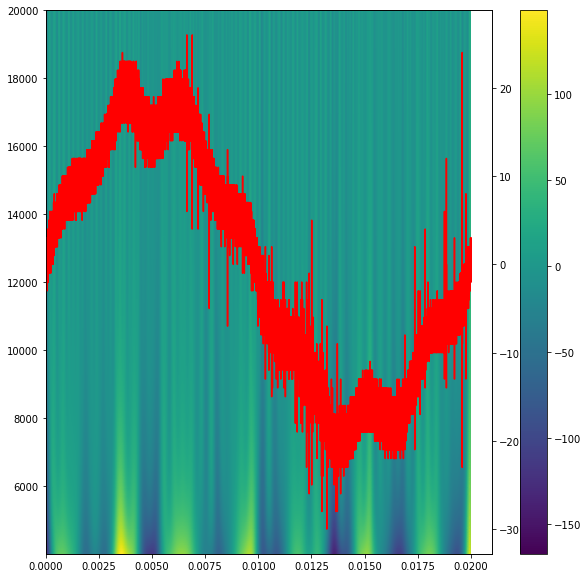

In [165]:
downsampled = signal.resample(train.iloc[:, 1], 800000 // 2)
widths = [i for i in range(1000, 5000, 20)]
z = signal.cwt(downsampled, signal.ricker, widths)
z_filt = signal.resample(z, num=z.shape[1] // 100, axis=1)
plt.figure(figsize=(10, 10))
plt.pcolormesh(
    [100 * j / (Fs / 2) for j in range(4000)],
    [Fs / 2 / (j) for j in widths],
    z_filt,

)
plt.colorbar()
ax2 = plt.twinx()
ax2.plot([j / Fs for j in range(800000)], train.iloc[:, 1], c="r")

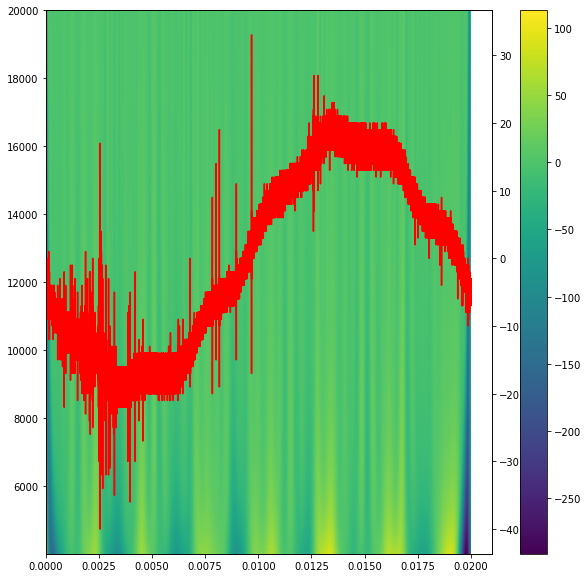

In [164]:
downsampled = signal.resample(train.iloc[:, 4], 800000 // 2)
widths = [i for i in range(1000, 5000, 20)]
z = signal.cwt(downsampled, signal.ricker, widths)
z_filt = signal.resample(z, num=z.shape[1] // 100, axis=1)
plt.figure(figsize=(10, 10))
plt.pcolormesh(
    [100 * j / (Fs / 2) for j in range(4000)],
    [Fs / 2 / (j) for j in widths],
    z_filt,

)
plt.colorbar()
ax2 = plt.twinx()
ax2.plot([j / Fs for j in range(800000)], train.iloc[:, 4], c="r")

In [173]:
z_filt.shape

(200, 4000)

In [169]:
z_filt.nbytes * 8712 / 1e9 # our train size is 8712

55.7568

In [172]:
z_filt.dtype

dtype('float64')

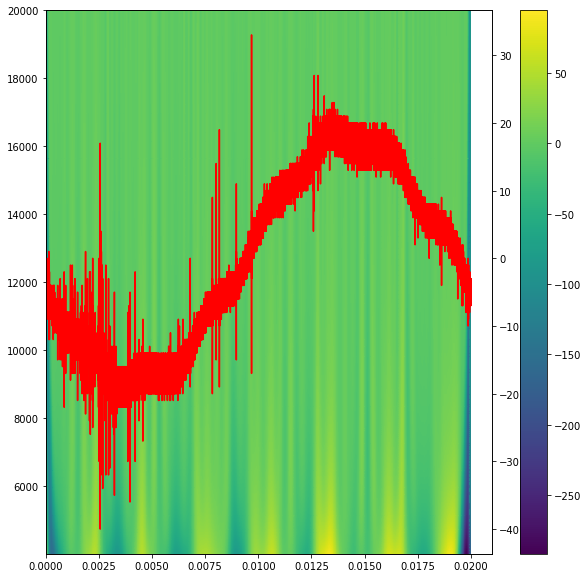

In [176]:
downsampled = signal.resample(train.iloc[:, 4], 800000 // 2)
widths = [i for i in range(1000, 5000, 20)]
z = signal.cwt(downsampled, signal.ricker, widths)
z_filt = signal.resample(z, num=z.shape[1] // 400, axis=1)
plt.figure(figsize=(10, 10))
plt.pcolormesh(
    [100 * j / (Fs / 8) for j in range(1000)],
    [Fs / 2 / (j) for j in widths],
    z_filt,

)
plt.colorbar()
ax2 = plt.twinx()
ax2.plot([j / Fs for j in range(800000)], train.iloc[:, 4], c="r")

In [178]:
z_filt.nbytes * 8712 / 1e9

13.9392

In [179]:
z_filt.shape

(200, 1000)

In [180]:
z_filt.astype(np.float32).nbytes * 8712 / 1e9

6.9696

It may be better to use DWT, since CWT is often very redundant. It may make more sense if our step size in the widths are smaller than integer values.
See [this comparison](https://www.mathworks.com/help/wavelet/gs/continuous-and-discrete-wavelet-transforms.html) of DWT and CWT specifically for matlab.
Usually for CWT you should use bases with scale $2^{\frac{j}{k}}$, for $j = \{1, 2, ...\}$ for some $k \gt 1$ is an integer.

Especially in the case of scipy implementation, there's problems. Just to get it to plot, we need to downsample the wavelet transform.
Scipy `cwt` will set $b_0$ to $\frac{1}{F_s}$. When we do SVD, we will need to load all 8712 signals into memory and make predictions, so we need
a compact representation of the signal(which DWT can provide us)

Text(0, 0.5, 'Voltage')

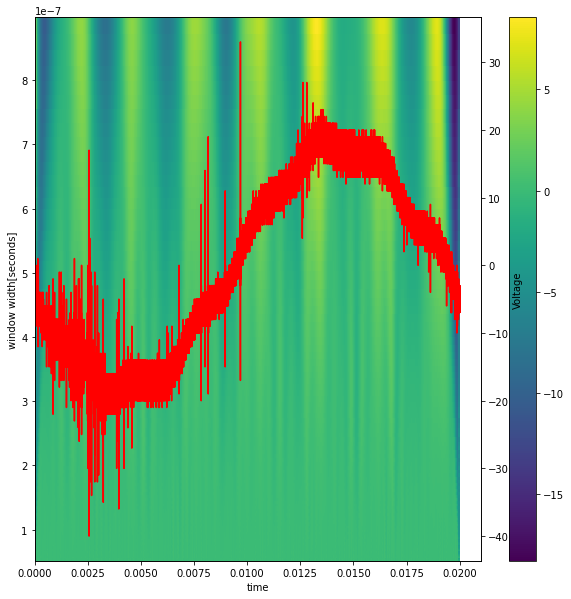

In [229]:
downsampled = signal.resample(train.iloc[:, 4], 800000 // 2 // 400)
k = 24
widths = [2 ** (j / k)for j in range(1, 101)]
z = signal.cwt(downsampled, signal.ricker, widths)
# z_filt = signal.resample(z, num=z.shape[1] // 400, axis=1)
z_filt = z
plt.figure(figsize=(10, 10))
plt.pcolormesh(
    [400 * j / (Fs / 2) for j in range(1000)],
    [1 / (Fs / 2) * (j) for j in widths],
    z_filt
)
plt.ylabel("window width[seconds]")
plt.xlabel("time")
plt.colorbar()
ax2 = plt.twinx()
ax2.plot([j / Fs for j in range(800000)], train.iloc[:, 4], c="r")
ax2.set_ylabel("Voltage")

In [230]:
z.shape

(100, 1000)

In [233]:
z.astype(np.float32).nbytes / 1e9 * 8712

3.4848000000000003

We should be able to load all train scalograms into memory at one time.

Text(0, 0.5, 'Voltage')

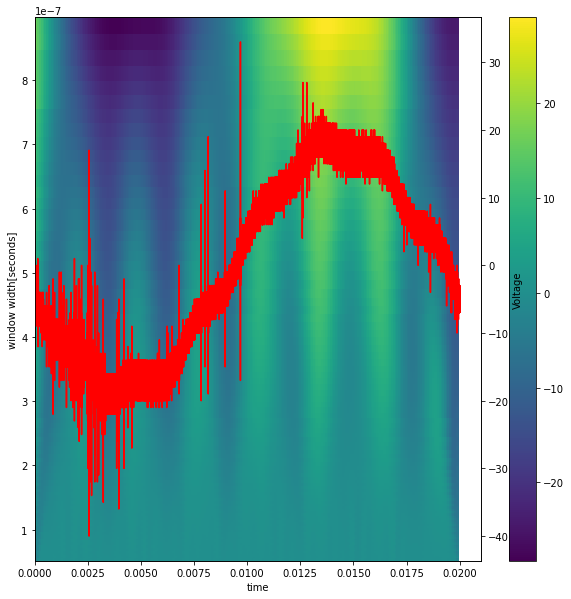

In [11]:
downsampled = signal.resample(train.iloc[:, 4], 800000 // 2 // 1600)
k = 24
widths = [2 ** (j / k)for j in range(1, 101)]
z = signal.cwt(downsampled, signal.ricker, widths)
z_filt = z
plt.figure(figsize=(10, 10))
plt.pcolormesh(
    [1600 * j / (Fs / 2) for j in range(250)],
    [1 / (Fs / 2) * (j) for j in widths],
    z_filt
)
plt.ylabel("window width[seconds]")
plt.xlabel("time")
plt.colorbar()
ax2 = plt.twinx()
ax2.plot([j / Fs for j in range(800000)], train.iloc[:, 4], c="r")
ax2.set_ylabel("Voltage")

In [12]:
z.shape

(100, 250)

In [13]:
z.astype(np.float32).nbytes * 1e-9 * 8712

0.8712000000000001